- **Author:** Jaime Carrasco
- **Fecha:** Otoño, 2025
- **Curso:** Investigación de Operaciones II

## Sistema M/M/1 (o en la notación de Kendall $M/M/1/\infty/\infty/FIFO)$
Se considera un sistema que consiste en una cola de capacidad infinita y un servidor (caja). Los tiempos entre llegadas de las entidades (clientes) son aleatorios iid $ \sim \exp(\lambda) $, el tiempo de servicio también es aleatorio, con distribución de probabilidad $ \sim \exp(\mu) $. Las entidades a medida que llegan al sistema, esperan en la cola hasta ser atendidos. La política de servicio es FCFS (o FIFO). 

Deseamos calcular estadísticos de largo plazo, tales como: 
- Cantidad esperada de clientes en un sistema: $ L $, 
- Cantidad esperada de clientes en una cola: $ L_Q $, 
- Tiempo de espera en el sistema: $ W $, 
- Tiempo de espera anticipado en la cola: $ W_Q $.

Desde la teoría desarrollada en clases, obtuvimos de forma analítica que:
- $ p_0 = 1 - \rho $
- $ p_n = \rho^n (1 - \rho) $
- $ L =  \rho/(1 - \rho) $
- $ W = \frac{1}{\lambda} \frac{\rho}{1 - \rho} $
donde $ \rho = \lambda/\mu $.

## Ejemplo para $ \lambda = 2.0 $, y $ \mu = 3.0 $

In [ ]:
# Cargamos la librería Numpy y seteamos los parámetros
import numpy as np

# Parámetros del sistema
lambda_ = 2.0   # tasa de llegada
mu = 3.0        # tasa de servicio
rho = lambda_ / mu

## Forma 1: Calcularemos los estadísticos de forma aproximada, usando directamente la definición:
Ejemplo: $ L = \sum_{n=0}^\infty n p_n $.
Como no podemos considerar infinitos estados (Nº de entidades en el sistema), 

podemos generar una suma de $N$ términos suficientemente grande de la siguiente manera:
$ L \approx \sum_{n=0}^N n \cdot p_n $
donde $ N $ puede ser variable.

In [ ]:
# Número de estados a considerar para aproximar p_n
N = 10

## Calculemos ahora: $ L \approx \sum_{n=0}^N n \cdot p_n $

In [ ]:
p = np.zeros(N) # inicializamos p, donde p[n] son las prob. límites
p[0] = 1 - rho  # p_0 = 1 - rho, prob. inicial

for n in range(1, N):
    p[n] = rho**n * p[0]

# Estadísticos desde las probabilidades p_n
L_est = sum(n * p[n] for n in range(N))               # L = E[número en el sistema]
Lq_est = sum((n - 1) * p[n] for n in range(1, N))     # L_Q = E[número en la cola]
W_est = L_est / lambda_                               # W = L / λ
Wq_est = Lq_est / lambda_                             # W_Q = L_Q / λ


# --- Mostrar resultados ---
print("=== Cálculo usando probabilidades estacionarias (sin fórmulas directas) ===")
print(f"L (esperado en el sistema):      {L_est:.4f}")
print(f"L_Q (esperado en la cola):       {Lq_est:.4f}")
print(f"W (tiempo en el sistema):        {W_est:.4f}")
print(f"W_Q (tiempo en la cola):         {Wq_est:.4f}")


=== Cálculo usando probabilidades estacionarias (sin fórmulas directas) ===
L (esperado en el sistema):      1.7919
L_Q (esperado en la cola):       1.1426
W (tiempo en el sistema):        0.8960
W_Q (tiempo en la cola):         0.5713


## Forma 2: Cálculo con fórmulas analíticas
- $ L =  \rho/(1 - \rho) $
- $ L_Q =  \rho^2/(1 - \rho) $
- $ W = \frac{1}{\lambda} \frac{\rho}{1 - \rho} $
- $ W_Q =  \frac{\lambda}{\mu (\mu - \lambda)} $

In [ ]:
L_formula = rho / (1 - rho)
Lq_formula = rho**2 / (1 - rho)
W_formula = 1 /lambda_ *  rho / (1 - rho)
Wq_formula = lambda_ / (mu * (mu - lambda_))

print("\n=== Cálculo usando fórmulas analíticas ===")
print(f"L (esperado en el sistema):      {L_formula:.4f}")
print(f"L_Q (esperado en la cola):       {Lq_formula:.4f}")
print(f"W (tiempo en el sistema):        {W_formula:.4f}")
print(f"W_Q (tiempo en la cola):         {Wq_formula:.4f}")


=== Cálculo usando fórmulas analíticas ===
L (esperado en el sistema):      2.0000
L_Q (esperado en la cola):       1.3333
W (tiempo en el sistema):        1.0000
W_Q (tiempo en la cola):         0.6667


## ¿Qué tan sensibles son los estadísticos a los parámetros ?

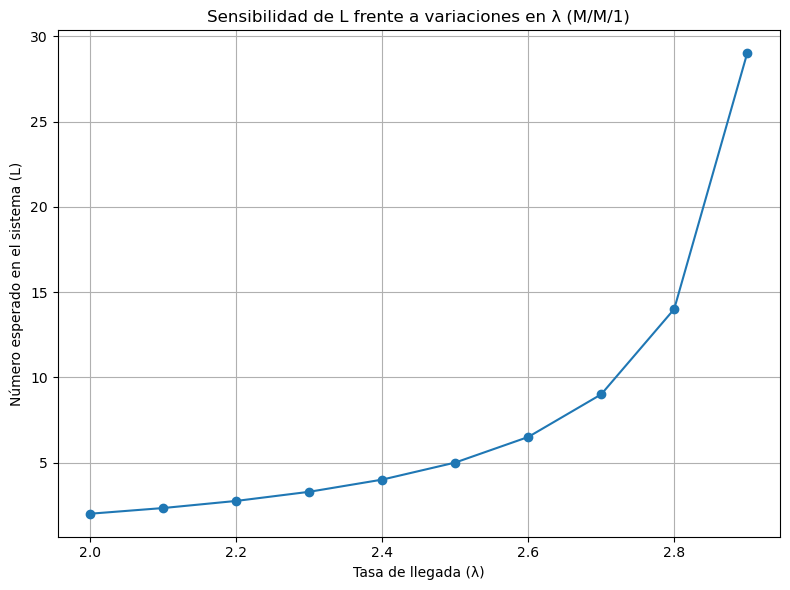

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro fijo
mu = 3.0

# Rango de valores de lambda
lambdas = np.arange(2.0, 2.91, 0.1)

# Calcular L para cada lambda usando la fórmula: L = lambda / (mu - lambda)
L_values = lambdas / (mu - lambdas)

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.plot(lambdas, L_values, marker='o')
plt.title('Sensibilidad de L frente a variaciones en λ (M/M/1)')
plt.xlabel('Tasa de llegada (λ)')
plt.ylabel('Número esperado en el sistema (L)')
plt.grid(True)
plt.tight_layout()
plt.show()
